In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-file/tested.csv


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix, classification_report

In [32]:
def histogram_rep(df,col_name, total_rows,x_label, x_labels, title, figsize):
    numeric_data = pd.to_numeric(df[col_name], errors='coerce')
    nan_count = numeric_data.isnull().sum()
    percentage_non_numeric = (nan_count / total_rows) * 100
    print(f"Percentage of non-numerical values in the '{col_name}' column: {percentage_non_numeric:.2f}%")

    # Get unique values in the 'previous' column
    unique_values = df[col_name].unique()
    print("Unique values in '{col_name}' column:")
    
    # Calculate the percentage of each unique value
    percentage_values = []
    for value in unique_values:
        count = (df[col_name] == value).sum()
        percentage = (count / total_rows) * 100
        percentage_values.append(percentage)
        print(f"Value: {value}, Percentage: {percentage:.2f}%")
         # Create a histogram
    plt.figure(figsize=figsize)
    plt.bar(unique_values, percentage_values)
    plt.xlabel(x_label)
    plt.ylabel('Percentage')
    plt.title(title)
    plt.xticks(unique_values, x_labels)
    plt.show()

In [33]:
def survival_percentage(data, column_name):
    unique_values = data[column_name].unique()
    
    percentages = {}
    
    for value in unique_values:
        subset = data[data[column_name] == value]
        survived_count = subset["Survived"].sum()
        total_count = len(subset)
        if total_count > 0:
            percentage = (survived_count / total_count) * 100
            percentages[value] = percentage
    
    return percentages

In [34]:
def survival_percentage_continuous(data, column_name, num_bins=None, bin_labels=None):
    if num_bins is None:
        num_bins = 10  # Default number of bins if not specified
    
    if bin_labels is None:
        bin_labels = [f'Bin {i+1}' for i in range(num_bins)]  # Default bin labels
    
    # Create bins for the specified column
    data['bins'] = pd.cut(data[column_name], bins=num_bins, labels=bin_labels)
    
    # Calculate survival percentages for each bin
    bin_percentages = {}
    
    for bin_label in bin_labels:
        subset = data[data['bins'] == bin_label]
        survived_count = subset['Survived'].sum()
        total_count = len(subset)
        
        if total_count > 0:
            percentage = (survived_count / total_count) * 100
            bin_percentages[bin_label] = percentage
             # Remove the 'bins' column from the DataFrame (optional)
    data.drop(columns=['bins'], inplace=True)
    
    # Create a bar chart to visualize the survival percentages
    plt.figure(figsize=(10, 6))
    plt.bar(bin_percentages.keys(), bin_percentages.values(), color='skyblue')
    plt.xlabel('Bins')
    plt.ylabel('Survival Percentage (%)')
    plt.title(f'Survival Percentage by {column_name}')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()
    
    return bin_percentages

In [35]:
def draw_pie_chart(percentages):
    labels = percentages.keys()
    sizes = list(percentages.values())  # Convert dict_values to a list
    
    # Generate a list of shades of blue based on the number of categories
    num_categories = len(labels)
    colors = plt.cm.Blues(np.linspace(0.1, 1, num_categories))
    
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    plt.pie(sizes, labels=None, colors=colors, autopct=lambda p: f'{p:.1f}%' if p > 0 else '', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Survival Percentage by Category')
    
    # Add custom legend
    legend_labels = [f'{label} ({sizes[i]:.1f}%)' for i, label in enumerate(labels) if sizes[i] > 0]
    plt.legend(legend_labels, loc='best')
    
    plt.show()

In [36]:
def find_between(s, first, last):
    try:
        start = s.index( first ) + len( first )
        end = s.index( last, start )
        return s[start:end]
    except ValueError:
        return ""

In [37]:
def percent(col_name, total_rows):
    numeric_data = pd.to_numeric(df[col_name], errors='coerce')
    nan_count = numeric_data.isnull().sum()
    percentage_non_numeric = (nan_count / total_rows) * 100
    print(f"Percentage of non-numerical values in the '{col_name}' column: {percentage_non_numeric:.2f}%")

    # Get unique values in the 'previous' column
    unique_values = df[col_name].unique()
    print("Unique values in '{col_name}' column:")
    
    # Calculate the percentage of each unique value
    percentage_values = []
    for value in unique_values:
        count = (df[col_name] == value).sum()
        percentage = (count / total_rows) * 100
        percentage_values.append(percentage)
        print(f"Value: {value}, Percentage: {percentage:.2f}%")

In [38]:
def get_null_percentage(dataframe):
    # Calculate the total number of rows in the DataFrame
    total_rows = len(dataframe)
    
    # Calculate the percentage of null values for each feature
    null_percentage = (dataframe.isnull().sum() / total_rows) * 100
    
    return null_percentage

In [39]:
# Define a function to extract the ticket category
def extract_ticket_category(ticket):
    if pd.isna(ticket):
        return None
    elif ' ' in ticket:
        return ticket.split(' ')[0]
    else:
        return 'Normal'

In [40]:
def fill_null_with_mode(dataframe, column_name):
    # Calculate the mode of the column
    mode_value = dataframe[column_name].mode().iloc[0]
    
    # Fill null values with the mode
    dataframe[column_name].fillna(mode_value, inplace=True)

READ THE DATASET

In [41]:
df = pd.read_csv('/kaggle/input/test-file/tested.csv')

DATA VISUALIZATION AND PRE-PROCESSING

In [42]:
print(df.head)

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                         

In [43]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [44]:
print(df.info)

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                       

In [45]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [46]:
print(df.info)

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                       

In [47]:
features = ['Pclass','Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked','Survived']
null_percentage = get_null_percentage(df[features])

# Print the null percentage for each feature
print("Percentage of null values for each feature:")
print(null_percentage,"%")

Percentage of null values for each feature:
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         20.574163
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.239234
Cabin       78.229665
Embarked     0.000000
Survived     0.000000
dtype: float64 %


In [48]:
features = ['Name', 'Sex', 'Age','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked','Survived']
null_percentage = get_null_percentage(df[features])

# Print the null percentage for each feature
print("Percentage of null values for each feature:")
print(null_percentage,"%")

Percentage of null values for each feature:
Name         0.000000
Sex          0.000000
Age         20.574163
Parch        0.000000
Ticket       0.000000
Fare         0.239234
Cabin       78.229665
Embarked     0.000000
Survived     0.000000
dtype: float64 %


In [49]:
df.drop(columns=['Cabin'], inplace=True)
df.drop(columns=['Age'], inplace=True)

In [50]:
# Remove 'Cabin' and 'Age' from the features list in one line
features = [feature for feature in features if feature not in ['Cabin', 'Age']]

# Print the updated features list
print(features)

['Name', 'Sex', 'Parch', 'Ticket', 'Fare', 'Embarked', 'Survived']


precentage of male who survived: 0.00%
precentage of female who survived: 100.00%


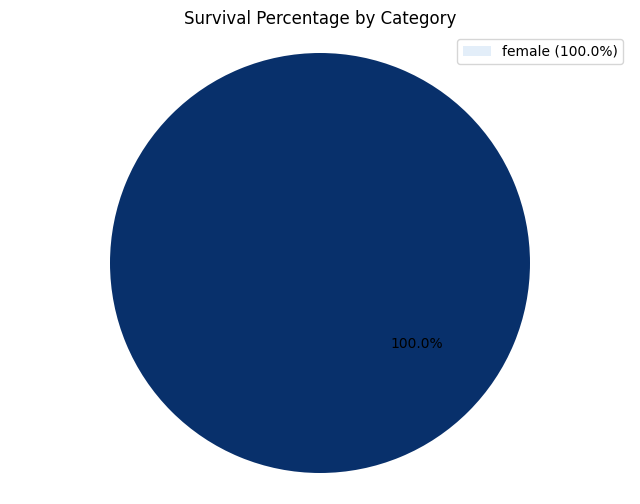

In [52]:
sex_result = survival_percentage(df, "Sex")

for key, value in sex_result.items():
    print(f"precentage of {key} who survived: {value:.2f}%")
    
draw_pie_chart(sex_result)

In [53]:
df['Title'] = df.apply(lambda row: find_between(row['Name'], ", ", "."), axis=1)
features.append('Title')
df.drop(columns=['Name'], inplace=True)
print(df['Title'])

0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
        ...  
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Title, Length: 418, dtype: object


In [54]:
# Remove 'Name' from the features list
features.remove('Name')

# Print the updated features list
print(features)

['Sex', 'Parch', 'Ticket', 'Fare', 'Embarked', 'Survived', 'Title']


In [56]:
# Remove 'Name' from the features list
features.remove('Sex')

# Print the updated features list
print(features)

['Parch', 'Ticket', 'Fare', 'Embarked', 'Survived', 'Title']


Percentage of non-numerical values in the 'Title' column: 100.00%
Unique values in '{col_name}' column:
Value: Mr, Percentage: 57.42%
Value: Mrs, Percentage: 17.22%
Value: Miss, Percentage: 18.66%
Value: Master, Percentage: 5.02%
Value: Ms, Percentage: 0.24%
Value: Col, Percentage: 0.48%
Value: Rev, Percentage: 0.48%
Value: Dr, Percentage: 0.24%
Value: Dona, Percentage: 0.24%


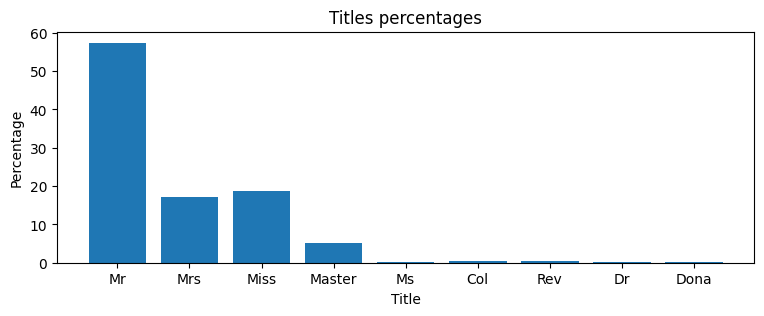

In [57]:
col_name = 'Title'
x_label = 'Title'
title = 'Titles percentages'
figsize = (9, 3)
x_labels = ['Mr', 'Mrs', 'Miss','Master','Ms','Col', 'Rev', 'Dr', 'Dona']

histogram_rep(df,col_name, len(df), x_label, x_labels, title, figsize)

precentage of Mr who survived: 0.00%
precentage of Mrs who survived: 100.00%
precentage of Miss who survived: 100.00%
precentage of Master who survived: 0.00%
precentage of Ms who survived: 100.00%
precentage of Col who survived: 0.00%
precentage of Rev who survived: 0.00%
precentage of Dr who survived: 0.00%
precentage of Dona who survived: 100.00%


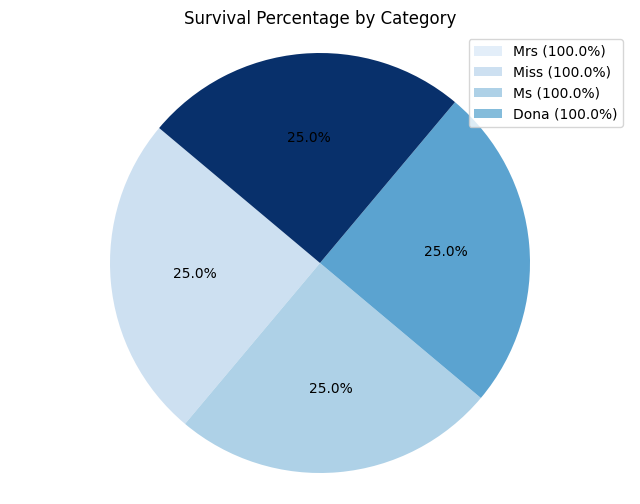

In [58]:
title_result = survival_percentage(df, "Title")

for key, value in title_result.items():
    print(f"precentage of {key} who survived: {value:.2f}%")
    
draw_pie_chart(title_result)      

In [59]:
df.drop(columns=['Title'], inplace=True)
features.remove('Title')
print(features)

['Parch', 'Ticket', 'Fare', 'Embarked', 'Survived']


In [60]:
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,male,0,0,330911,7.8292,Q
1,893,1,3,female,1,0,363272,7.0000,S
2,894,0,2,male,0,0,240276,9.6875,Q
3,895,0,3,male,0,0,315154,8.6625,S
4,896,1,3,female,1,1,3101298,12.2875,S


EMBARKED

Percentage of non-numerical values in the 'Embarked' column: 100.00%
Unique values in '{col_name}' column:
Value: Q, Percentage: 11.00%
Value: S, Percentage: 64.59%
Value: C, Percentage: 24.40%


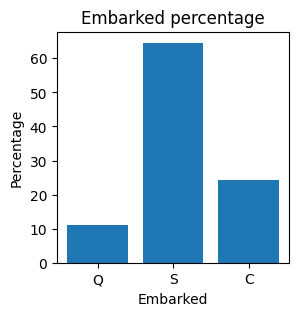

In [61]:
col_name = 'Embarked'
x_label = 'Embarked'
x_labels = ['Q','S','C']
title = 'Embarked percentage'
figsize = (3,3)

histogram_rep(df,col_name, len(df),x_label, x_labels, title, figsize)

precentage of Q who survived: 52.17%
precentage of S who survived: 32.59%
precentage of C who survived: 39.22%


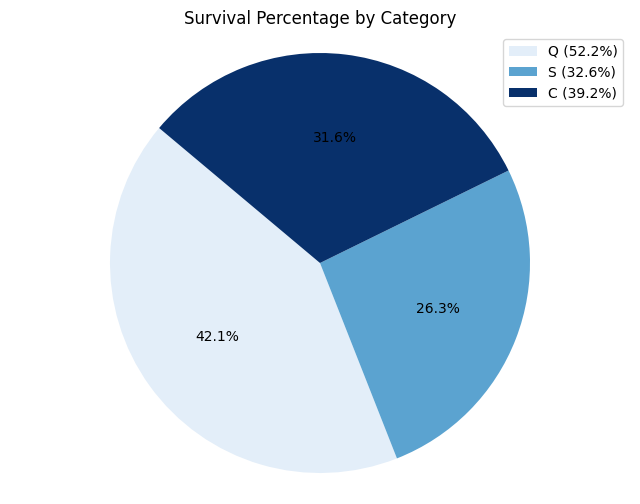

In [62]:
embarked_result = survival_percentage(df, "Embarked")

for key, value in embarked_result.items():
    print(f"precentage of {key} who survived: {value:.2f}%")
    
draw_pie_chart(embarked_result)

Percentage of non-numerical values in the 'Pclass' column: 0.00%
Unique values in '{col_name}' column:
Value: 3, Percentage: 52.15%
Value: 2, Percentage: 22.25%
Value: 1, Percentage: 25.60%


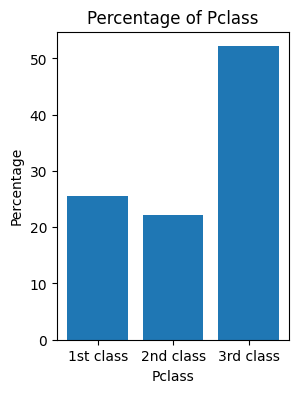

In [63]:
col_name = 'Pclass'
x_label = 'Pclass'
x_labels = ['3rd class', '2nd class', '1st class']
title = 'Percentage of Pclass'
figsize = (3,4)

histogram_rep(df,col_name, len(df),x_label, x_labels, title, figsize)

precentage of 3 who survived: 33.03%
precentage of 2 who survived: 32.26%
precentage of 1 who survived: 46.73%


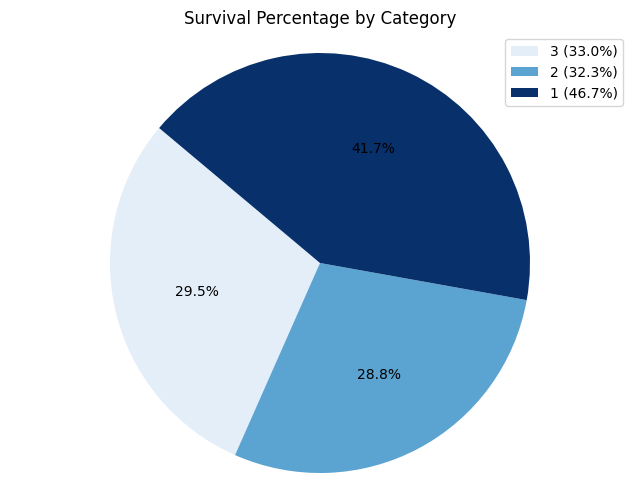

In [64]:
embarked_result = survival_percentage(df, "Pclass")

for key, value in embarked_result.items():
    print(f"precentage of {key} who survived: {value:.2f}%")
    
draw_pie_chart(embarked_result)

Ticket

In [65]:
# Split the 'Ticket' column and store the first part in 'Ticket_category'
df['Ticket_category'] = df['Ticket'].str.split(' ').str[0]

In [66]:
col_name = 'Ticket'
df['Ticket_category'] = df[col_name].apply(extract_ticket_category)
percent('Ticket_category', len(df))

Percentage of non-numerical values in the 'Ticket_category' column: 100.00%
Unique values in '{col_name}' column:
Value: Normal, Percentage: 70.81%
Value: A/4, Percentage: 0.72%
Value: W.E.P., Percentage: 0.24%
Value: SC/PARIS, Percentage: 1.44%
Value: STON/O2., Percentage: 0.24%
Value: PC, Percentage: 7.66%
Value: C, Percentage: 0.72%
Value: A/5., Percentage: 0.72%
Value: SC/AH, Percentage: 0.48%
Value: C.A., Percentage: 4.55%
Value: W./C., Percentage: 1.20%
Value: SOTON/O.Q., Percentage: 1.91%
Value: STON/O, Percentage: 0.48%
Value: SC/A.3, Percentage: 0.24%
Value: F.C.C., Percentage: 0.96%
Value: F.C., Percentage: 0.48%
Value: A./5., Percentage: 0.24%
Value: PP, Percentage: 0.24%
Value: STON/OQ., Percentage: 0.24%
Value: SOTON/OQ, Percentage: 0.24%
Value: CA, Percentage: 0.96%
Value: SC/A4, Percentage: 0.24%
Value: S.O./P.P., Percentage: 0.96%
Value: CA., Percentage: 0.96%
Value: S.O.C., Percentage: 0.48%
Value: SOTON/O2, Percentage: 0.24%
Value: AQ/4, Percentage: 0.24%
Value: A., P

In [67]:
df.drop(columns=['Ticket'], inplace=True)
features.remove('Ticket')
features.append('Ticket_category')
print(features)

['Parch', 'Fare', 'Embarked', 'Survived', 'Ticket_category']


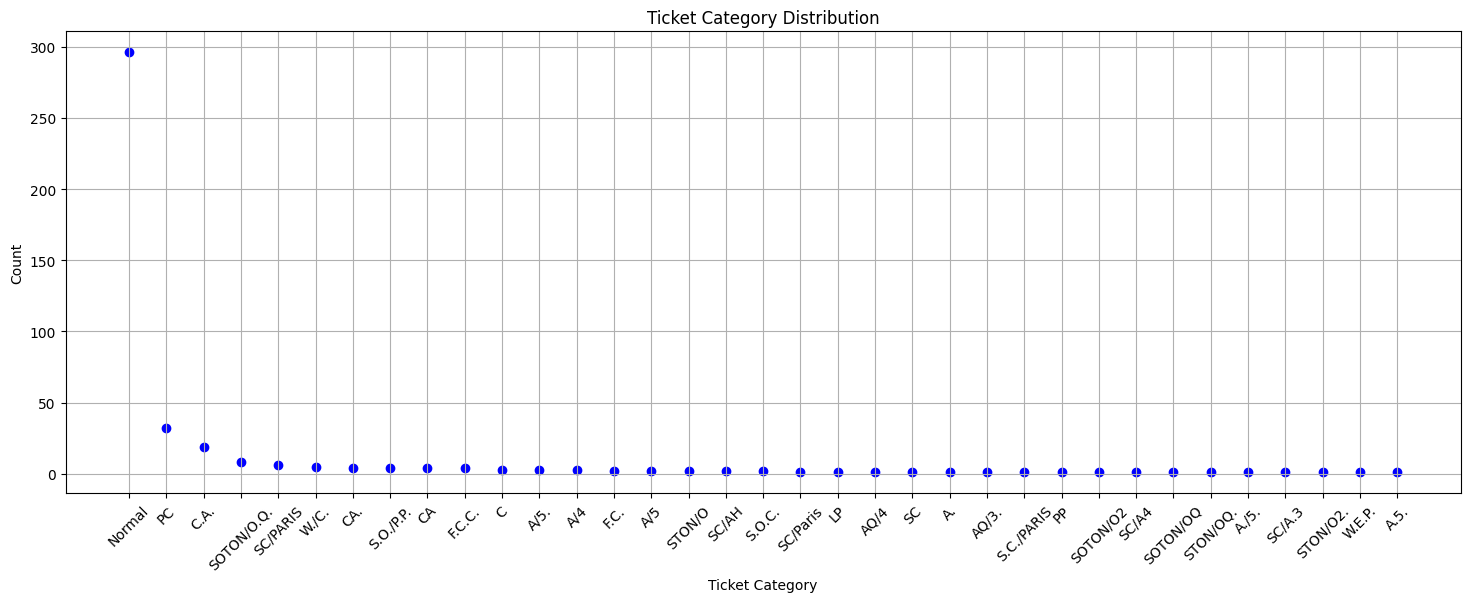

In [68]:
# Calculate the count of each ticket category
ticket_category_counts = df['Ticket_category'].value_counts()

# Extract unique categories and their counts
categories = ticket_category_counts.index
counts = ticket_category_counts.values

# Create a scatter plot
plt.figure(figsize=(18, 6))
plt.scatter(categories, counts, c='blue', marker='o')
plt.xlabel('Ticket Category')
plt.ylabel('Count')
plt.title('Ticket Category Distribution')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [69]:
df.drop(columns=['Ticket_category'], inplace=True)
features.remove('Ticket_category')
print(features)

['Parch', 'Fare', 'Embarked', 'Survived']


Fare

Percentage of non-numerical values in the 'Fare' column: 0.24%
Unique values in '{col_name}' column:
Value: 7.8292, Percentage: 0.24%
Value: 7.0, Percentage: 0.48%
Value: 9.6875, Percentage: 0.24%
Value: 8.6625, Percentage: 1.91%
Value: 12.2875, Percentage: 0.24%
Value: 9.225, Percentage: 0.24%
Value: 7.6292, Percentage: 0.24%
Value: 29.0, Percentage: 0.24%
Value: 7.2292, Percentage: 2.15%
Value: 24.15, Percentage: 0.24%
Value: 7.8958, Percentage: 2.63%
Value: 26.0, Percentage: 4.55%
Value: 82.2667, Percentage: 0.48%
Value: 61.175, Percentage: 0.24%
Value: 27.7208, Percentage: 1.44%
Value: 12.35, Percentage: 0.48%
Value: 7.225, Percentage: 2.15%
Value: 7.925, Percentage: 1.20%
Value: 59.4, Percentage: 0.72%
Value: 3.1708, Percentage: 0.24%
Value: 31.6833, Percentage: 0.24%
Value: 61.3792, Percentage: 0.24%
Value: 262.375, Percentage: 1.20%
Value: 14.5, Percentage: 0.96%
Value: 61.9792, Percentage: 0.24%
Value: 30.5, Percentage: 0.24%
Value: 21.6792, Percentage: 0.48%
Value: 31.5, Perce

<Axes: xlabel='Fare', ylabel='Density'>

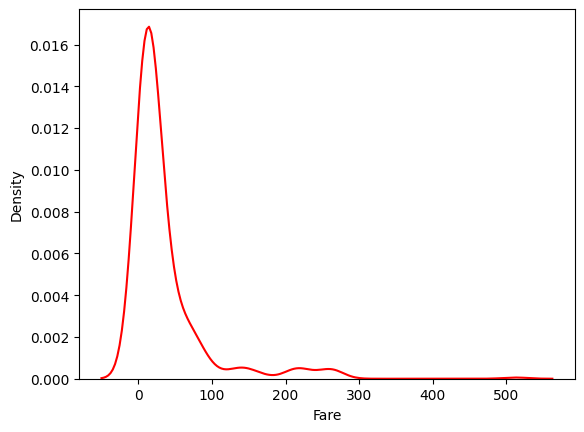

In [70]:
col_name = 'Fare'
percent(col_name, len(df))
sns.kdeplot(data=df['Fare'], color='red')